<a href="https://colab.research.google.com/github/Sabipikin/Jobs/blob/main/Detecting_Abnormal_Behaviour_AI_Modelling_of_Activities_of_Daily_Living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load data
base_path = '/content/drive/MyDrive/Kachi/Activities'

activities = os.listdir(base_path)
data, labels = [], []

for idx, activity in enumerate(activities):
    activity_path = os.path.join(base_path, activity)
    for img_name in os.listdir(activity_path):
        img_path = os.path.join(activity_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128)) # Resize for consistent input shape
        data.append(img.astype(np.float32)/255.0)  # Ensure the image is in the correct format
        labels.append(idx)

data = np.array(data) / 255.0
data = np.expand_dims(data, axis=-1) # Since the images are grayscale
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

# Build a basic CNN as a placeholder (you'd replace this with your T-GCN architecture)
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(activities), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/10
116/116 [==============================] - 59s 502ms/step - loss: 1.5660 - accuracy: 0.4247 - val_loss: 1.5429 - val_accuracy: 0.4341
Epoch 2/10
116/116 [==============================] - 50s 427ms/step - loss: 1.5497 - accuracy: 0.4257 - val_loss: 1.5524 - val_accuracy: 0.4341
Epoch 3/10
116/116 [==============================] - 42s 361ms/step - loss: 1.5464 - accuracy: 0.4257 - val_loss: 1.5401 - val_accuracy: 0.4341
Epoch 4/10
116/116 [==============================] - 45s 386ms/step - loss: 1.5453 - accuracy: 0.4257 - val_loss: 1.5234 - val_accuracy: 0.4341
Epoch 5/10
116/116 [==============================] - 43s 370ms/step - loss: 1.5257 - accuracy: 0.4257 - val_loss: 1.5095 - val_accuracy: 0.4341
Epoch 6/10
116/116 [==============================] - 43s 372ms/step - loss: 1.4973 - accuracy: 0.4257 - val_loss: 1.4301 - val_accuracy: 0.4341
Epoch 7/10
116/116 [==============================] - 43s 371ms/step - loss: 1.3262 - accuracy: 0.4837 - val_loss: 1.1531 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a model named 'model' and test data 'X_test' and 'y_test'
y_pred = model.predict(X_test)

# If it's a multi-class classification:
predicted_classes = np.argmax(y_pred, axis=1)

# If it's binary classification, you might threshold the prediction:
# predicted_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report (includes precision, recall, and F1-score)
print(classification_report(y_test, predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print(conf_matrix)

# For binary classification, you can also plot ROC and compute AUC
if len(np.unique(y_test)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

33/33 [==============================] - 5s 137ms/step
Accuracy: 72.88%
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       185
           1       0.00      0.00      0.00        59
           2       0.60      1.00      0.75       214
           3       0.92      0.94      0.93       410
           4       0.40      0.20      0.26       101
           5       0.21      0.07      0.11        56

    accuracy                           0.73      1025
   macro avg       0.47      0.48      0.45      1025
weighted avg       0.67      0.73      0.68      1025

[[122   0  18   7  30   8]
 [ 13   0  35   5   0   6]
 [  0   0 214   0   0   0]
 [  0   0  23 387   0   0]
 [ 35   0  41   4  20   1]
 [ 12   0  24  16   0   4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


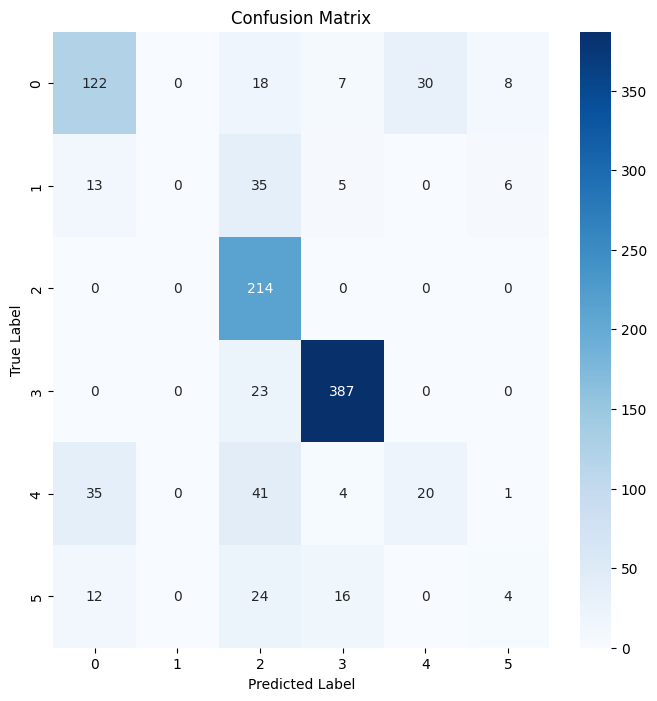

In [ ]:
import seaborn as sns

# ...

# Assuming you've already predicted classes with:
# y_pred = model.predict(X_test)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.show()

classes = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, predicted_classes)
plot_confusion_matrix(conf_matrix, classes)

# For binary classification, you can also plot the ROC curve and compute the AUC
if len(classes) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

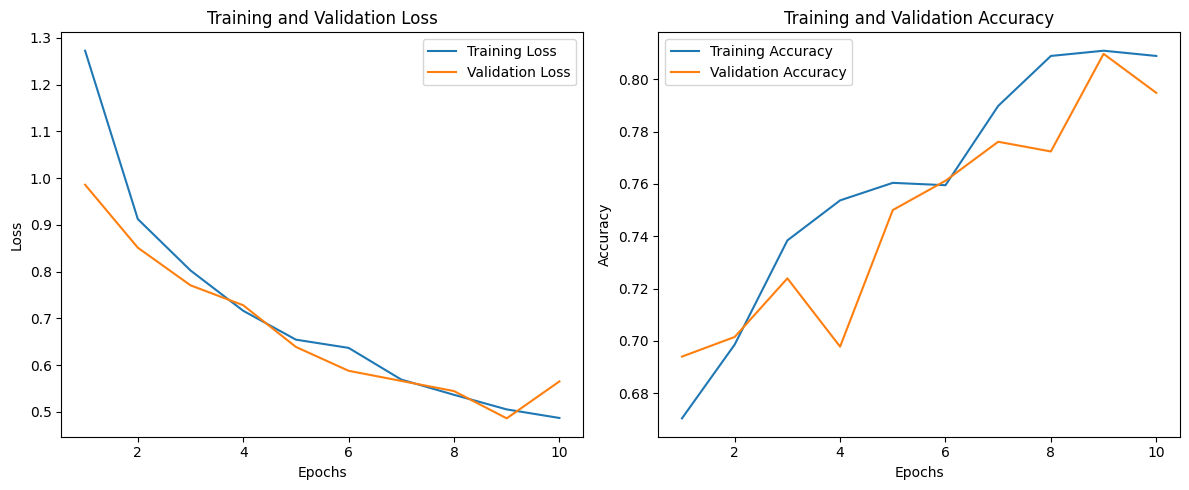

In [ ]:
import matplotlib.pyplot as plt

# Results from the provided epochs
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [1.2727, 0.9126, 0.8027, 0.7165, 0.6547, 0.6371, 0.5693, 0.5367, 0.5055, 0.4872]
train_accuracy = [0.6704, 0.6986, 0.7384, 0.7537, 0.7604, 0.7595, 0.7898, 0.8089, 0.8109, 0.8089]
val_loss = [0.9860, 0.8514, 0.7709, 0.7283, 0.6391, 0.5881, 0.5664, 0.5447, 0.4864, 0.5654]
val_accuracy = [0.6940, 0.7015, 0.7239, 0.6978, 0.7500, 0.7612, 0.7761, 0.7724, 0.8097, 0.7948]

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Implement LIME**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ae6ce1c58bb3933a9909251ce9361e63fc6670f7f35a597907abaffe7e565b58
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt

In [ ]:
image_to_explain = X_test[0]

In [ ]:
image_to_explain_rgb = cv2.cvtColor(image_to_explain, cv2.COLOR_GRAY2RGB)

In [ ]:
simplified_model = Sequential()
simplified_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))  # Note: 3 channels now
simplified_model.add(MaxPooling2D((2,2)))
simplified_model.add(Flatten())
simplified_model.add(Dense(64, activation='relu'))
simplified_model.add(Dense(len(activities), activation='softmax'))

simplified_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(image_to_explain_rgb, simplified_model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


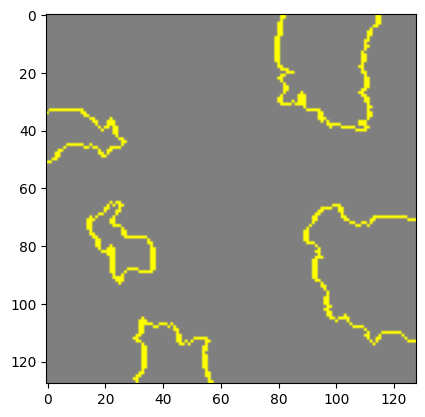

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Enter path for image 1 (or press Enter to stop): /content/drive/MyDrive/Kachi/Activities/Boiling water/20200304T103157_103166.png
Enter path for image 2 (or press Enter to stop): /content/drive/MyDrive/Kachi/Activities/Boiling water/20200304T103157_103168.png
Enter path for image 3 (or press Enter to stop): /content/drive/MyDrive/Kachi/Activities/Boiling water/20200304T103157_103169.png
Enter path for image 4 (or press Enter to stop): /content/drive/MyDrive/Kachi/Activities/Boiling water/20200304T103157_103170.png
Enter path for image 5 (or press Enter to stop): /content/drive/MyDrive/Kachi/Activities/Boiling water/20200304T103157_103171.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 74ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


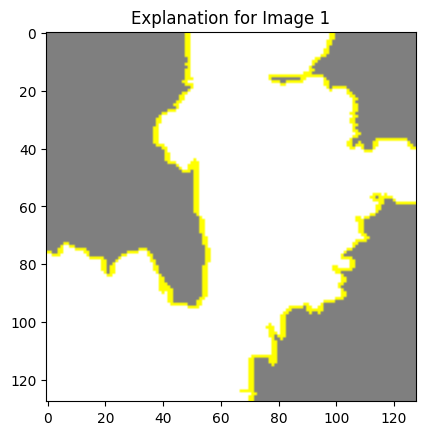

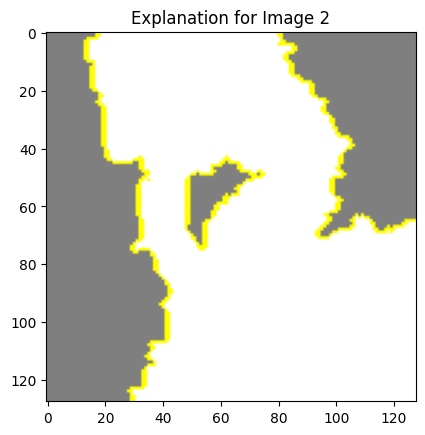

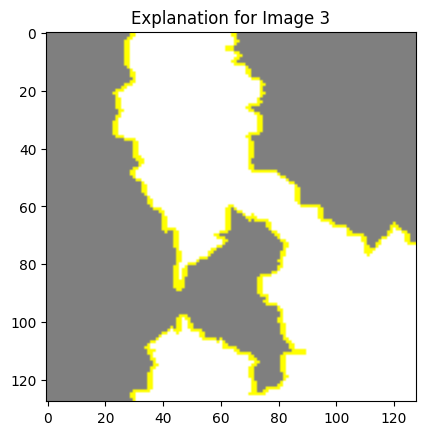

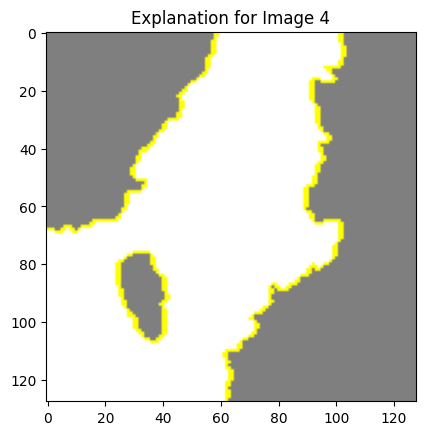

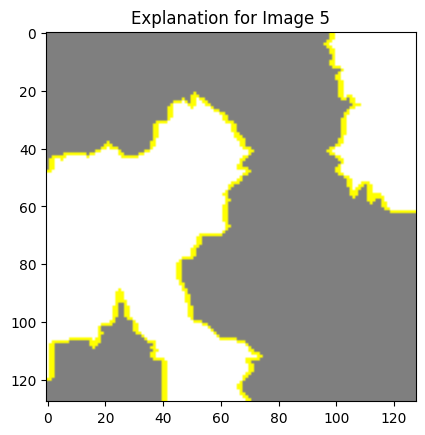

In [ ]:
# Function to get user input for image paths
def get_image_paths():
    image_paths = []
    for i in range(5):
        path = input(f"Enter path for image {i+1} (or press Enter to stop): ")
        if not path:
            break
        if os.path.exists(path):
            image_paths.append(path)
        else:
            print(f"Error: The file '{path}' does not exist. Please enter a valid path.")
    return image_paths

# Get image paths from user input
image_paths = get_image_paths()

if image_paths:
    # Initialize LIME
    explainer = LimeImageExplainer()

    for idx, image_path in enumerate(image_paths):
        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        # Generate explanation
        explanation = explainer.explain_instance(img_rgb, simplified_model.predict)

        # Visualize explanation
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
        plt.figure()
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.title(f'Explanation for Image {idx+1}')

    plt.show()
else:
    print("No valid image paths provided.")